In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,ID,Count
0,2011100100,135
1,2011100101,96
2,2011100102,111
3,2011100103,102
4,2011100104,54


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13152 entries, 0 to 13151
Data columns (total 2 columns):
ID       13152 non-null int64
Count    13152 non-null int64
dtypes: int64(2)
memory usage: 205.6 KB


In [5]:
train.shape

(13152, 2)

In [6]:
test = pd.read_csv('test.csv')

In [7]:
test.head()

,ID,Count
0,2013040100,NaN
1,2013040101,NaN
2,2013040102,NaN
3,2013040103,NaN
4,2013040104,NaN


In [8]:
test.shape

(2928, 2)

In [9]:
test['ID'] = test['ID'].apply(str)

test['ID-format'] = pd.to_datetime(test['ID'], format="%Y%m%d%H", errors='ignore')
import  numpy as  np
date_array = np.zeros((13152, 4), dtype = np.int)

test_date_list = []
for i in test['ID-format']:
    date = str(i).split('-')
    year = int(date[0])
    month = int(date[1])
    day = int(date[2].split(' ')[0])
    hour = int(date[2].split(' ')[1].split(':')[0])
    test_date_list.append([year, month, day, hour])

test_date_array = np.array(test_date_list)
test_date_array

array([[2013,    4,    1,    0],
       [2013,    4,    1,    1],
       [2013,    4,    1,    2],
       ..., 
       [2013,    7,   31,   21],
       [2013,    7,   31,   22],
       [2013,    7,   31,   23]])

In [10]:
X = train['ID']
X = X.values.reshape(13152,1)

In [11]:
y = train['Count']
y = y.values.reshape(13152,1)

In [12]:
# Splitting X and y into two datasets just for train/test split for cross validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [13]:
# defaults splitting ratio into 75% for training and rest for test
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(9864, 1)
(3288, 1)
(9864, 1)
(3288, 1)


In [14]:
# 1. Import the class
from sklearn.linear_model import LinearRegression

# 2. Instantiate the estimator
linreg = LinearRegression()

# 3. Fit the model with data
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print (linreg.intercept_)
print (linreg.coef_)

[-265577.02210153]
[[ 0.00013211]]


In [16]:
# 4. Predict the response for a new observation
y_pred = linreg.predict(X_test)

In [17]:
# importing metrics for evaluating the model
from sklearn import metrics

# for finding the sqrt
import numpy as np

print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

102.954629569


In [18]:
df = train

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13152 entries, 0 to 13151
Data columns (total 2 columns):
ID       13152 non-null int64
Count    13152 non-null int64
dtypes: int64(2)
memory usage: 205.6 KB


In [20]:
df['ID'] = df['ID'].apply(str)

In [21]:
df['ID-format'] = pd.to_datetime(df['ID'], format="%Y%m%d%H", errors='ignore')

In [22]:
import  numpy as  np
date_array = np.zeros((13152, 4), dtype = np.int)
date_array

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ..., 
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [23]:
date_list = []
for i in df['ID-format']:
    date = str(i).split('-')
    year = int(date[0])
    month = int(date[1])
    day = int(date[2].split(' ')[0])
    hour = int(date[2].split(' ')[1].split(':')[0])
    date_list.append([year, month, day, hour])

In [24]:
date_array = np.array(date_list)
date_array

array([[2011,   10,    1,    0],
       [2011,   10,    1,    1],
       [2011,   10,    1,    2],
       ..., 
       [2013,    3,   31,   21],
       [2013,    3,   31,   22],
       [2013,    3,   31,   23]])

In [25]:
X = date_array
y = df['Count']

In [26]:
# Splitting X and y into two datasets just for train/test split for cross validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [27]:
# 1. Import the class
from sklearn.linear_model import LinearRegression

# 2. Instantiate the estimator
linreg = LinearRegression()

# 3. Fit the model with data
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
# 4. Predict the response for a new observation
y_pred = linreg.predict(X_test)

In [29]:
# importing metrics for evaluating the model
from sklearn import metrics

# for finding the sqrt
import numpy as np

print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

90.8212922556


In [30]:
# Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

90.8227450188


In [31]:
# Lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

90.948784291


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import GridSearchCV

In [33]:
models = [
  [LinearRegression(), {"fit_intercept": [True, False]}], 
  [SVR(), {"kernel": ["linear", "poly", "rbf", "sigmoid"]}], 
  [KNeighborsRegressor(), {"n_neighbors": [1,2], "weights": ["uniform", "distance"]}], 
  [DecisionTreeRegressor(), {"criterion": ["mse", "friedman_mse"], "splitter": ["best", "random"],
    "min_samples_split": [x for x in range(2,6)] # generates a list [2,3,4,5]
  }],
  [GradientBoostingRegressor(), {"loss": ["ls", "lad", "huber", "quantile"]}],
  [GaussianProcessRegressor(), {}],
  [PLSRegression(), {}],
  [AdaBoostRegressor(), {}]
]

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

118.613751777


In [35]:
# param_grid = {"kernel": ["linear", "poly", "rbf", "sigmoid"]}
# Suppor Vector Regression
from sklearn.svm import SVR
model = SVR(kernel = 'sigmoid')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# rbf - 122.396480259
# linear - 92.1001100146
# poly - 
# sigmoid - 129.62115264

129.62115264


In [36]:
# K Nearest Neighbors Regression

from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

70.3208229381


In [72]:
k_range = range(1, 26)
scores = []
for k in k_range:
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

ValueError: Can't handle mix of multiclass and continuous

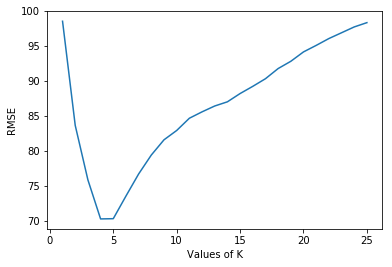

In [38]:

import matplotlib.pyplot as plt

# for plotting the graph inside the notebook itself
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Values of K')
plt.ylabel('RMSE')

In [39]:
criterion_attributes =  ["mse", "friedman_mse"]
splitter_attributes = ["best", "random"]
min_samples_split_values =  [x for x in range(2,6)] 

from sklearn.tree import DecisionTreeRegressor
for i in criterion_attributes:
    for j in splitter_attributes:
        for k in min_samples_split_values:
            model = DecisionTreeRegressor(criterion = i, splitter = j, min_samples_split= k)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            print (i, j, k, np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mse best 2 55.8024654114
mse best 3 55.1691534528
mse best 4 53.6874841559
mse best 5 52.6884473056
mse random 2 72.936635083
mse random 3 69.0093565141
mse random 4 68.3819911624
mse random 5 61.5534616267
friedman_mse best 2 56.0729695995
friedman_mse best 3 55.2855147275
friedman_mse best 4 53.446915389
friedman_mse best 5 52.6698765417
friedman_mse random 2 69.0410858319
friedman_mse random 3 66.2975831049
friedman_mse random 4 67.597463879
friedman_mse random 5 65.0555741041


In [40]:
loss_attributes = ["ls", "lad", "huber", "quantile"]

from sklearn.ensemble import GradientBoostingRegressor

for l in loss_attributes:
    model = GradientBoostingRegressor(loss = l)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# ls - 68.3850350767 - best
# lad - 70.7275875363
# huber - 68.779914475
# quantile - 105.812775735

68.3850350767
71.0730454713
68.779914475
105.815337543


In [41]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = GaussianProcessRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

62.4708756187


In [42]:
from sklearn.cross_decomposition import PLSRegression
model = PLSRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

115.564199737


In [43]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

88.1438496497


In [44]:
# for model in models:
#     regressor = model[0]
#     param_grid = model[1]
#     model = GridSearchCV(regressor, param_grid)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     accuracy = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#     print('Model name: ', model)
#     print('Accuracy: ',accuracy)


In [45]:
# best model for this data, DecisionTreeRegressor with following hyperparameter tuning
# friedman_mse best 5 52.6503302236
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion = 'friedman_mse', splitter = 'best', min_samples_split= 5)
model.fit(X, y)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [46]:
falloff = []
for i in model.predict(test_date_array):
    falloff.append(i)

In [47]:
test['Count'] = falloff

In [48]:
test.drop('ID-format', inplace = True, axis = 1)

In [49]:
test.to_csv('submission.csv', index = False)

In [50]:
# # GaussianProcessRegressor
# from sklearn.gaussian_process import GaussianProcessRegressor
# model = GaussianProcessRegressor()
# model.fit(X, y)
# y_pred = model.predict(test_date_array)

# # Adaboost
# from sklearn.ensemble import AdaBoostRegressor
# model = AdaBoostRegressor()
# model.fit(X, y)
# y_pred = model.predict(test_date_array)


# # Linear Regression -intercept True
# from sklearn.linear_model import LinearRegression
# model = LinearRegression(fit_intercept=True)
# model.fit(X, y)
# y_pred = model.predict(test_date_array)


# # Lasso regression
# from sklearn.linear_model import Lasso
# model = Lasso()
# model.fit(X, y)
# y_pred = model.predict(test_date_array)


# Ridge 
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X, y)
y_pred = model.predict(test_date_array)
# Score - 188.3907545207


# # K Nearest Neighbors Regression

# from sklearn.neighbors import KNeighborsRegressor
# model = KNeighborsRegressor()
# model.fit(X, y)
# y_pred = model.predict(test_date_array)

# # Suppor Vector Regression
# from sklearn.svm import SVR
# model = SVR(kernel = 'linear')
# model.fit(X, y)
# y_pred = model.predict(test_date_array)

In [51]:
falloff = []
for i in y_pred:
    falloff.append(i)

In [52]:
test['Count'] = falloff
test.to_csv('submission-ridge.csv', index = False)

In [53]:
# import tensorflow as tf
# import numpy
# import matplotlib.pyplot as plt
# rng = numpy.random

# # Parameters
# learning_rate = 0.01
# training_epochs = 1000
# display_step = 50

# # Training Data
# train_X = X_train
# train_Y = y_train
# n_samples = train_X.shape[0]

# # tf Graph Input
# X = tf.placeholder("float")
# Y = tf.placeholder("float")

# # Set model weights
# W = tf.Variable(rng.randn(), name="weight")
# b = tf.Variable(rng.randn(), name="bias")

# # Construct a linear model
# pred = tf.add(tf.multiply(X, W), b)

# # Mean squared error
# cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# # Gradient descent
# #  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# # Initialize the variables (i.e. assign their default value)
# init = tf.global_variables_initializer()

# # Start training
# with tf.Session() as sess:

#     # Run the initializer
#     sess.run(init)

#     # Fit all training data
#     for epoch in range(training_epochs):
#         for (x, y) in zip(train_X, train_Y):
#             sess.run(optimizer, feed_dict={X: x, Y: y})

#         # Display logs per epoch step
#         if (epoch+1) % display_step == 0:
#             c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
#             print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
#                 "W=", sess.run(W), "b=", sess.run(b))

#     print("Optimization Finished!")
#     training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
#     print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

#     # Graphic display
#     plt.plot(train_X, train_Y, 'ro', label='Original data')
#     plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
#     plt.legend()
#     plt.show()

#     # Testing example, as requested (Issue #2)
#     test_X = X_test
#     test_Y = y_test

#     print("Testing... (Mean square loss Comparison)")
#     testing_cost = sess.run(
#         tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
#         feed_dict={X: test_X, Y: test_Y})  # same function as cost above
#     print("Testing cost=", testing_cost)
#     print("Absolute mean square loss difference:", abs(
#         training_cost - testing_cost))

#     plt.plot(test_X, test_Y, 'bo', label='Testing data')
#     plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
#     plt.legend()
#     plt.show()

In [173]:
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import numpy as np


train_x = X_train
train_y = y_train.values.T
train_y = np.expand_dims(train_y, axis=1)
test_x = X_test
test_y = y_test.values.T
test_y = np.expand_dims(test_y, axis=1)

n_dim = train_x.shape[1]

In [174]:
learning_rate = 0.01
training_epochs = 1000
cost_history = np.empty(shape=[1],dtype=float)

X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,1])
W = tf.Variable(tf.ones([n_dim,1]))

init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [175]:
y_ = tf.matmul(X, W)
cost = tf.reduce_mean(tf.square(y_ - Y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

MSE: nan


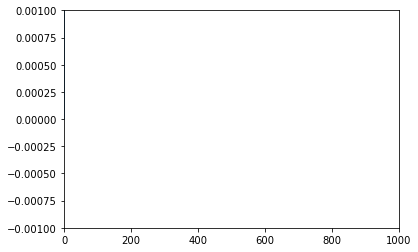

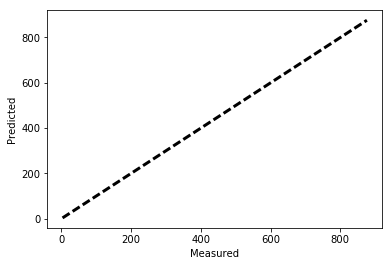

In [176]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        sess.run(training_step,feed_dict={X:train_x,Y:train_y})
        cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: train_x,Y: train_y}))
          
    #calculate mean square error 
    pred_y = sess.run(y_, feed_dict={X: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    print("MSE: %.4f" % sess.run(mse)) 
    
    #plot cost
    plt.plot(range(len(cost_history)),cost_history)
    plt.axis([0,training_epochs,0,np.max(cost_history)])
    plt.show()
    
    fig, ax = plt.subplots()
    ax.scatter(test_y, pred_y)
    ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()

In [163]:
train_x

array([[2012,   12,   11,   20],
       [2011,   12,   21,   11],
       [2012,    8,   13,    4],
       ..., 
       [2012,    5,    4,    8],
       [2013,    2,   19,    4],
       [2011,   10,   10,   19]])

In [156]:
train_y

array([[423],
       [189],
       [117],
       ..., 
       [144],
       [342],
       [204]])

In [164]:
test_x

array([[2012,    4,   23,   19],
       [2011,   12,   27,    2],
       [2013,    3,    1,   18],
       ..., 
       [2011,   12,    2,   13],
       [2012,    8,   13,   14],
       [2012,    5,   18,    6]])

In [158]:
test_y

array([[375],
       [ 99],
       [516],
       ..., 
       [159],
       [186],
       [123]])